In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [268]:
df = pd.read_csv("auto_mpg_dataset.csv")

In [269]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
5,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,15.0
6,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,14.0
7,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,14.0
8,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,14.0
9,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,15.0


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
mpg             398 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [271]:
df['horsepower'].replace(-100000.0 , np.NaN , inplace = True )

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
mpg             398 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [273]:
df['horsepower'].fillna(np.mean(df['horsepower']) , inplace = True)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
mpg             398 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [275]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.000000,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.000000,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.000000,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.000000,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.000000,3449.0,10.5,70,1,ford torino,17.0
5,8,429.0,198.000000,4341.0,10.0,70,1,ford galaxie 500,15.0
6,8,454.0,220.000000,4354.0,9.0,70,1,chevrolet impala,14.0
7,8,440.0,215.000000,4312.0,8.5,70,1,plymouth fury iii,14.0
8,8,455.0,225.000000,4425.0,10.0,70,1,pontiac catalina,14.0
9,8,390.0,190.000000,3850.0,8.5,70,1,amc ambassador dpl,15.0


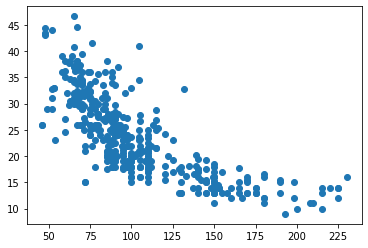

In [276]:
plt.scatter(  df['horsepower'] ,df['mpg'])

<BarContainer object of 398 artists>

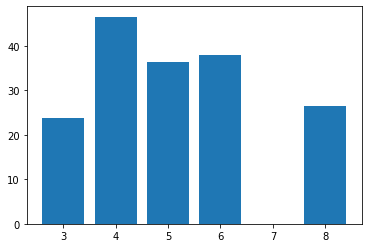

In [277]:
plt.bar(df['cylinders'], df['mpg'])

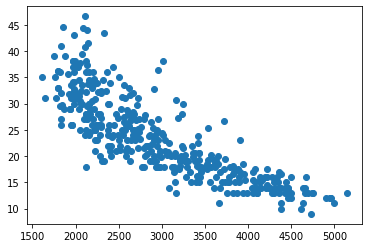

In [278]:
plt.scatter(df['weight'], df['mpg'])

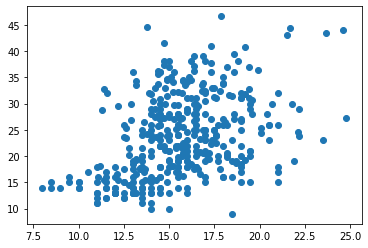

In [279]:
plt.scatter(df['acceleration'], df['mpg'])

<BarContainer object of 398 artists>

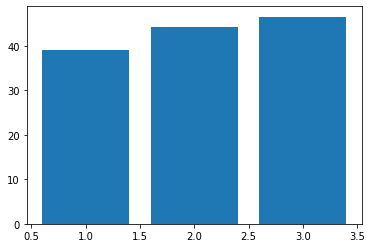

In [280]:
plt.bar(df['origin'], df['mpg'])

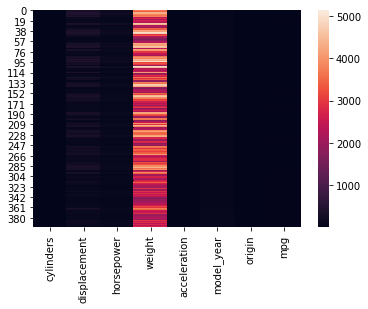

In [281]:
#df.drop(['car_name'] , axis = 1)
sns.heatmap(df.drop(['car_name'] , axis = 1))

<BarContainer object of 398 artists>

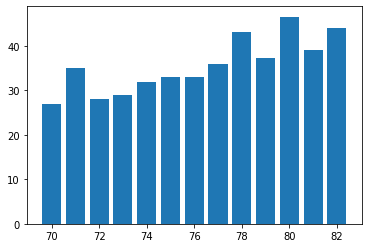

In [282]:
plt.bar(df['model_year'], df['mpg'])

In [283]:
def Linear_Regression_OLS(x , y):
    xMean = np.mean(x)
    yMean = np.mean(y)
    i = sum( (x-xMean) * (y-yMean) )
    j = sum((x-xMean) **2 )
    M = i / j 
    B = yMean - (M*xMean)
    Y = (M*x) + B
    plt.scatter(x, y)
    plt.plot(x, Y, color='red')

def Linear_Regression_Gradient_Descent(x , y , M=0 , B=0 ,Alpha =.0001 ):
    for i in range(1000):
        Y = (M*x) + B
        D_M = ((-2 / len(x)) *(sum(x * (y - Y ) )))
        D_B = (-2/len(x)) * sum(y - Y)
        B = B - Alpha *D_B
        M = M - Alpha * D_M
    Y = (M*x) + B
    plt.scatter( x, y)
    plt.plot(x, Y, color='red')
    plt.show()

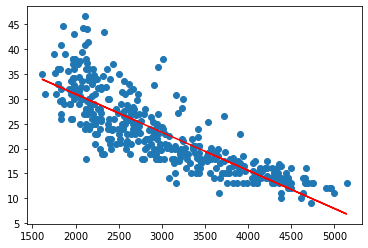

In [284]:
Linear_Regression_OLS(df['weight'] , df['mpg'] )

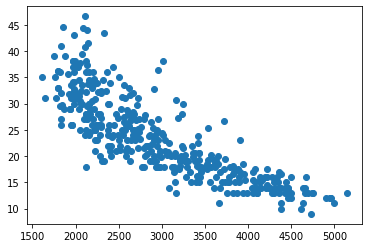

In [51]:
Linear_Regression_Gradient_Descent(df['weight'] , df['mpg'] )

In [297]:
df.head()
df['test'] = df['weight'] / df['model_year']
df.head()


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,test
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0,50.057143
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0,52.757143
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0,49.085714
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0,49.042857
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0,49.271429


In [298]:
df['car'] = [df['car_name'][i].split()[0] for i in range(len(df)) ]
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,test,car
0,8,307.0,130.000000,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0,50.057143,chevrolet
1,8,350.0,165.000000,3693.0,11.5,70,1,buick skylark 320,15.0,52.757143,buick
2,8,318.0,150.000000,3436.0,11.0,70,1,plymouth satellite,18.0,49.085714,plymouth
3,8,304.0,150.000000,3433.0,12.0,70,1,amc rebel sst,16.0,49.042857,amc
4,8,302.0,140.000000,3449.0,10.5,70,1,ford torino,17.0,49.271429,ford
5,8,429.0,198.000000,4341.0,10.0,70,1,ford galaxie 500,15.0,62.014286,ford
6,8,454.0,220.000000,4354.0,9.0,70,1,chevrolet impala,14.0,62.200000,chevrolet
7,8,440.0,215.000000,4312.0,8.5,70,1,plymouth fury iii,14.0,61.600000,plymouth
8,8,455.0,225.000000,4425.0,10.0,70,1,pontiac catalina,14.0,63.214286,pontiac
9,8,390.0,190.000000,3850.0,8.5,70,1,amc ambassador dpl,15.0,55.000000,amc


In [299]:
car = list(df['car'].unique())
l = list(range(0,37))
zipped = dict(zip(car ,l ))
zipped
df['car ZIP'] = df['car'].apply(lambda x: zipped[x])


In [300]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,test,car,car ZIP
0,8,307.0,130.000000,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0,50.057143,chevrolet,0
1,8,350.0,165.000000,3693.0,11.5,70,1,buick skylark 320,15.0,52.757143,buick,1
2,8,318.0,150.000000,3436.0,11.0,70,1,plymouth satellite,18.0,49.085714,plymouth,2
3,8,304.0,150.000000,3433.0,12.0,70,1,amc rebel sst,16.0,49.042857,amc,3
4,8,302.0,140.000000,3449.0,10.5,70,1,ford torino,17.0,49.271429,ford,4
5,8,429.0,198.000000,4341.0,10.0,70,1,ford galaxie 500,15.0,62.014286,ford,4
6,8,454.0,220.000000,4354.0,9.0,70,1,chevrolet impala,14.0,62.200000,chevrolet,0
7,8,440.0,215.000000,4312.0,8.5,70,1,plymouth fury iii,14.0,61.600000,plymouth,2
8,8,455.0,225.000000,4425.0,10.0,70,1,pontiac catalina,14.0,63.214286,pontiac,5
9,8,390.0,190.000000,3850.0,8.5,70,1,amc ambassador dpl,15.0,55.000000,amc,3


In [301]:
df['car'].nunique()

37

<BarContainer object of 398 artists>

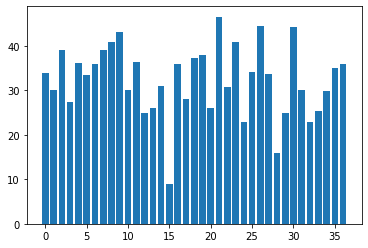

In [302]:
#plt.figure(figsize=(30, 20))
#set(hFig, 'Position', [0, 0, 50, 50])
plt.bar(df['car ZIP'] , df['mpg'])

In [377]:
f=df[['horsepower'  ,'model_year' ,'origin','acceleration','test' , 'car ZIP' ,'cylinders' ]]
t = df['mpg']
X_train , X_test , Y_train , Y_test = train_test_split(f, t , test_size = .25 , random_state =42)
X_train

,horsepower,model_year,origin,acceleration,test,car ZIP,cylinders
245,66.000000,78,1,14.4,23.076923,4,4
110,94.000000,73,3,16.5,32.589041,8,4
16,97.000000,70,1,15.5,39.628571,3,6
66,150.000000,72,1,11.5,51.000000,3,8
153,105.000000,75,1,16.0,46.120000,0,6
7,215.000000,70,1,8.5,61.600000,2,8
19,46.000000,70,2,20.5,26.214286,9,4
137,150.000000,74,1,14.5,63.500000,1,8
353,74.000000,81,2,14.2,27.037037,9,4
347,65.000000,81,3,19.4,24.382716,8,4


In [371]:
import sklearn as skl  
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
lin.fit(X_train, Y_train) 
pre = lin.predict(X_test)
skl.metrics.r2_score(Y_test , pre )

0.8171326760722264

In [372]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train)
pre2 = pol_reg.predict(poly_reg.fit_transform(X_test))
skl.metrics.r2_score(Y_test , pre2 )

0.026723428445738828

In [379]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1500, random_state = 42)
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
skl.metrics.r2_score(Y_test , predictions )


0.9032116749304496

In [374]:
#from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor

#from pydot import graph_from_dot_data

dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)
skl.metrics.r2_score(Y_test , y_pred )
#f=df[['horsepower','cylinders','acceleration','model_year','test']] >>>>>>>> r2= .835


0.818306425406979